<a href="https://colab.research.google.com/github/ashwinraou/FMML_projects_and_labs/blob/main/Image_Detection_And_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Detection And Segmentation

# Importing Required Libraries and Modules

In [1]:
import numpy as np
import skimage.data as skda
import skimage.transform as sktr
import skimage.filters as skfi
import skimage.morphology as skmo
import skimage.draw as skdr
import skimage.color as skco
import skimage.util as skut
import skimage.io as skio


import matplotlib.pyplot as plt

import cv2

## Reading an image from already existing sample dataset

In [2]:
image_coins = skda.coins()

## Displaying the loaded image

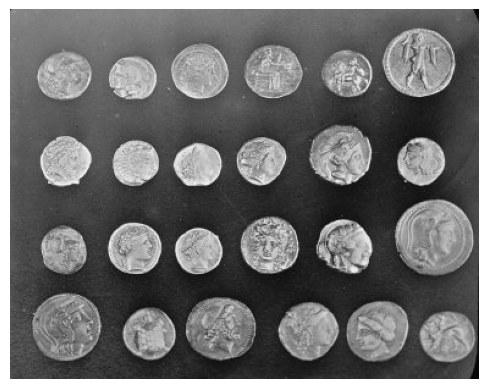

In [3]:
plt.imshow(image_coins, cmap = plt.cm.gray)
plt.axis('off')
plt.show()

# Object detection and segmentation in classical ways

## Gaussian operation does smoothing of the image

In [4]:
# %%timeit
blur_image_coins = skfi.gaussian(image_coins, sigma = 3,)

## Displaying the smoothed image

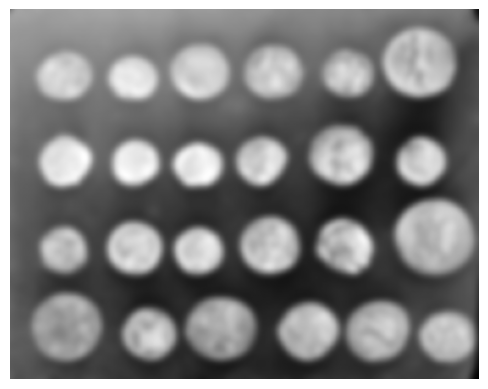

In [5]:
plt.imshow(blur_image_coins, cmap = plt.cm.gray)
plt.axis('off')
plt.show()

# The steps of semi-automatic segmentation and object detection

## Finding a threshold value, above which we treat as areas of objects of interests

In [6]:
threshold = skfi.threshold_otsu(blur_image_coins)

gated_blur_image_coins = blur_image_coins > threshold

## It is called creation of masks from the image

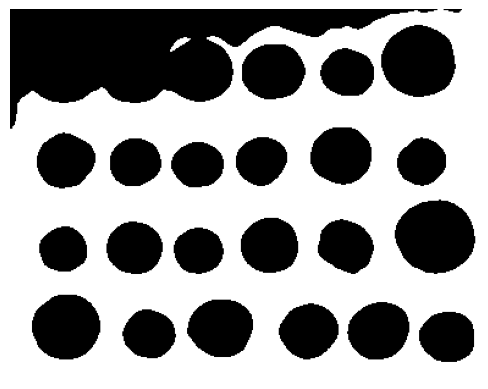

In [7]:
plt.imshow(gated_blur_image_coins, cmap = plt.cm.binary)
plt.axis('off')
plt.show()

## Finding the possible objects from the prepared mask.
### These possible masks are found out using connected component concept.

In [8]:
components = skmo.label(gated_blur_image_coins)

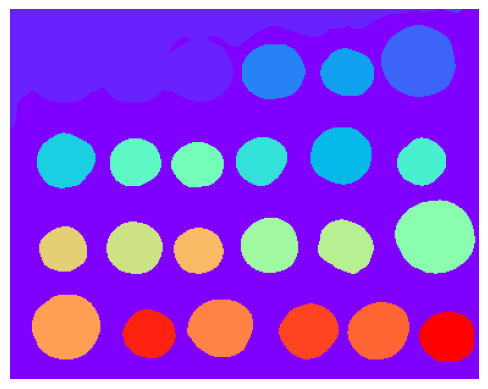

In [9]:
plt.imshow(components, cmap = plt.cm.rainbow)
plt.axis('off')
plt.show()

## Displaying individual masks of objects

In [10]:
unique_labels = np.unique(components)

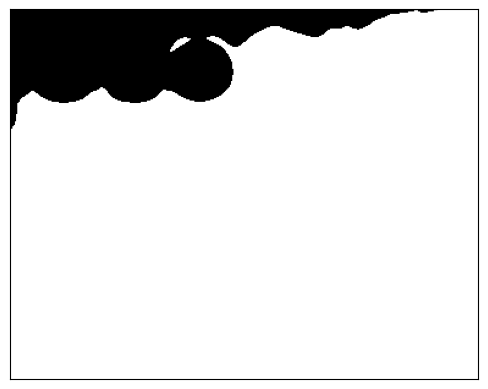

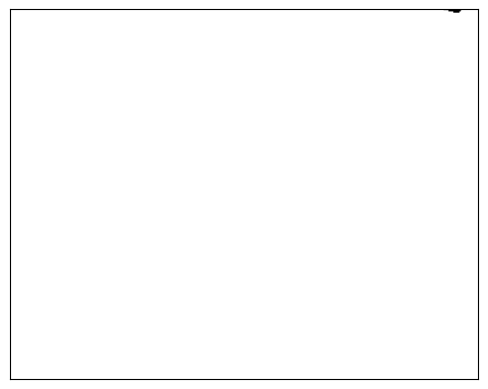

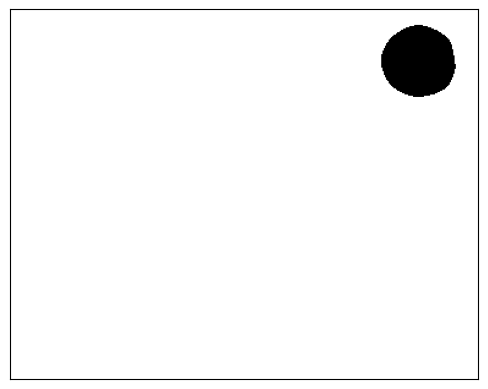

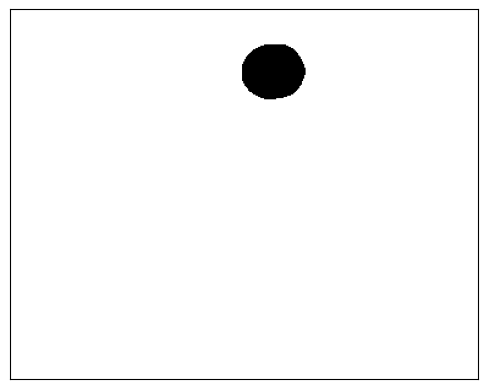

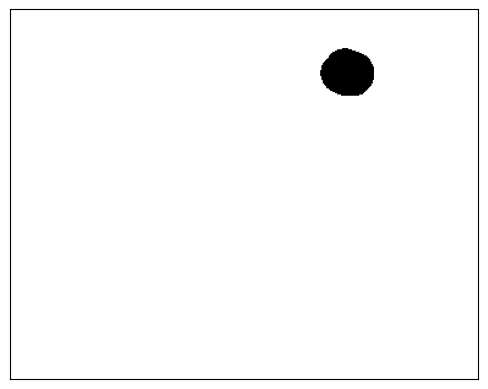

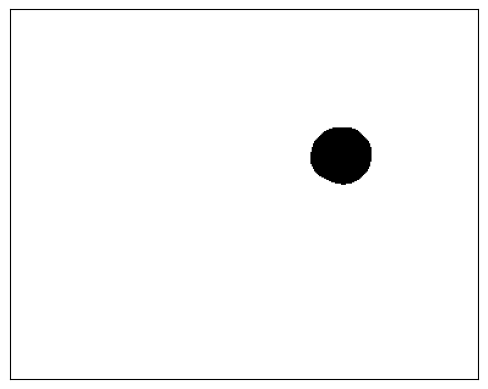

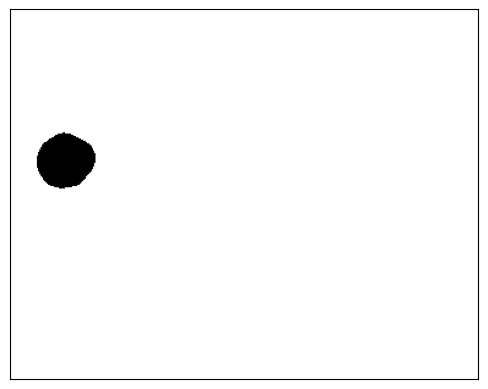

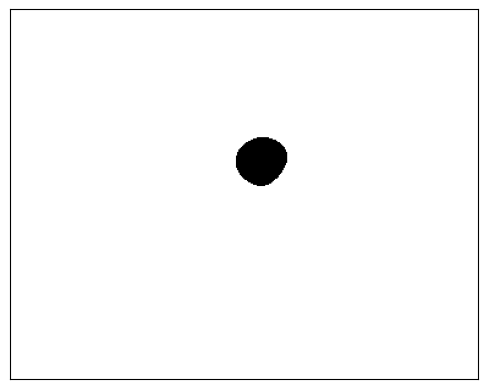

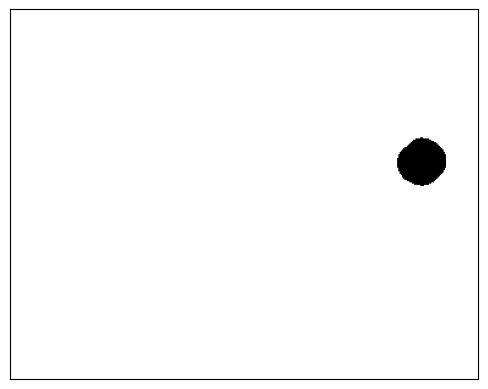

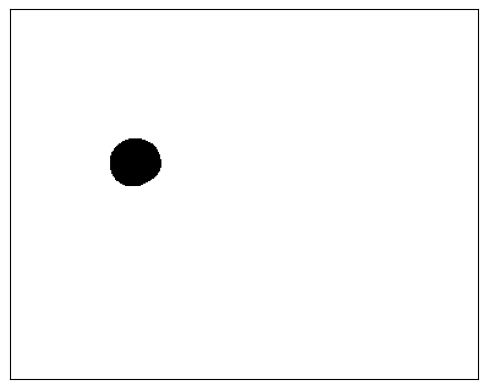

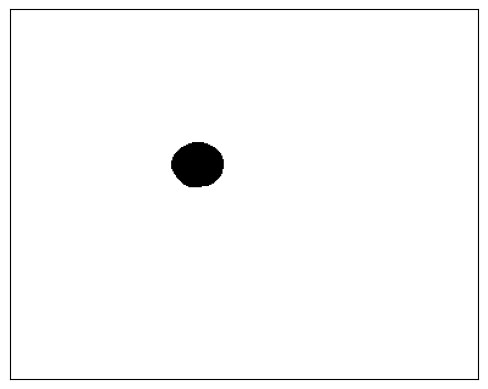

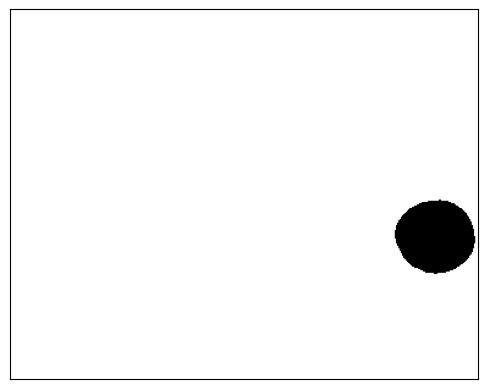

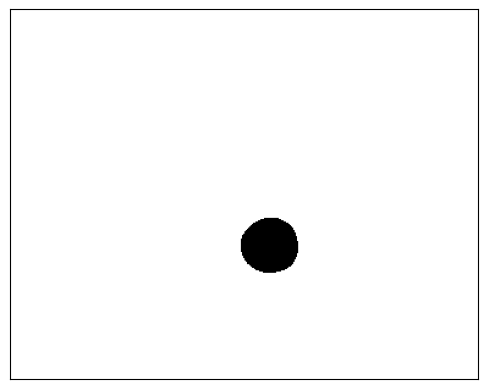

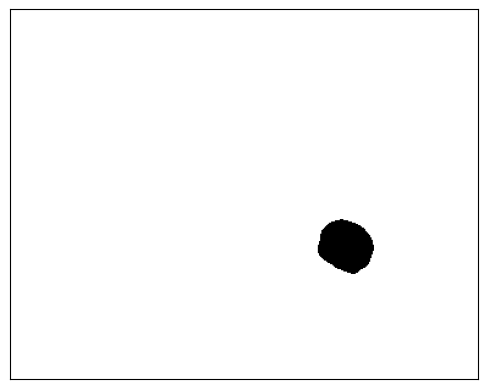

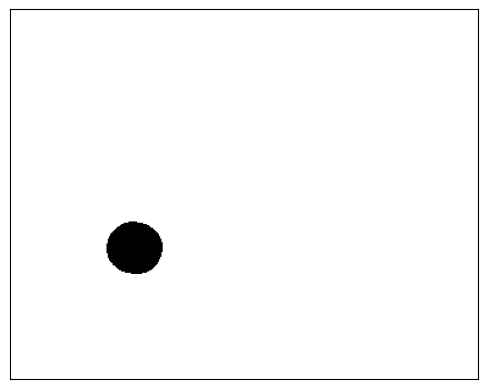

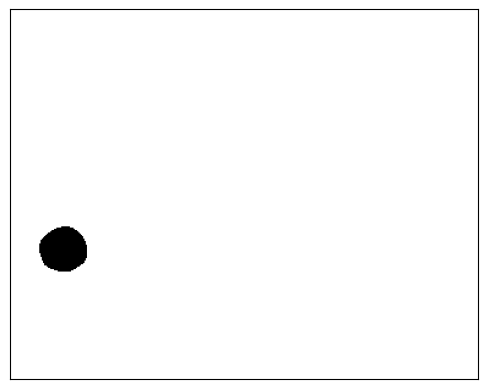

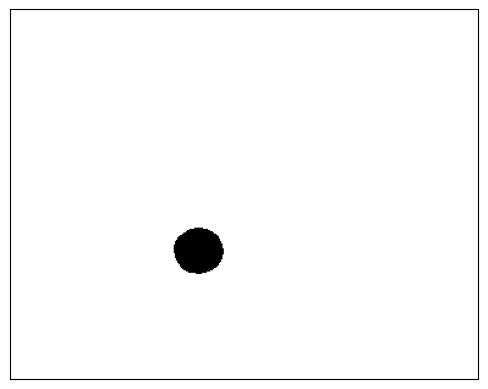

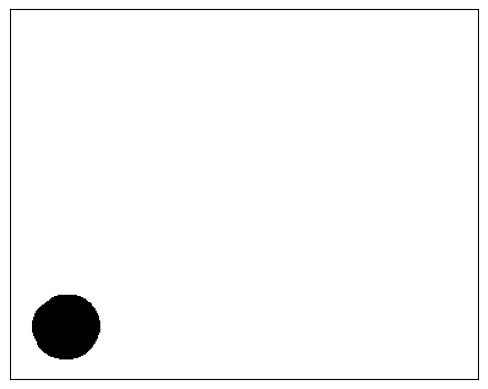

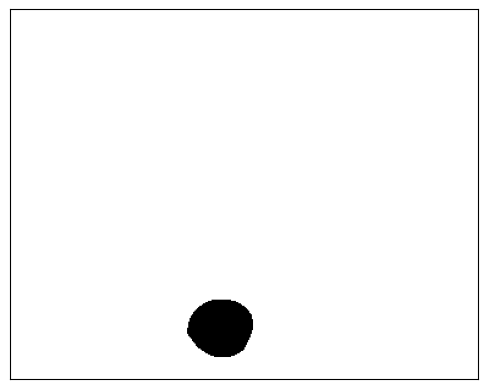

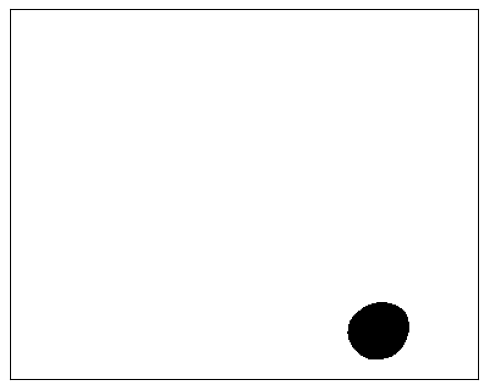

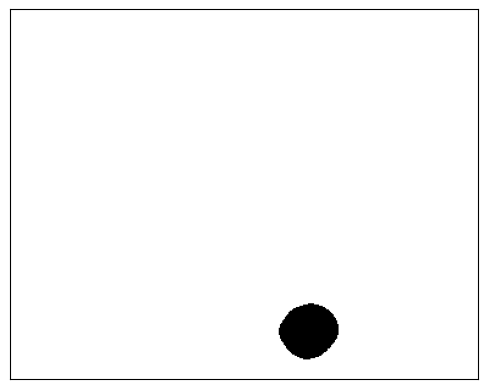

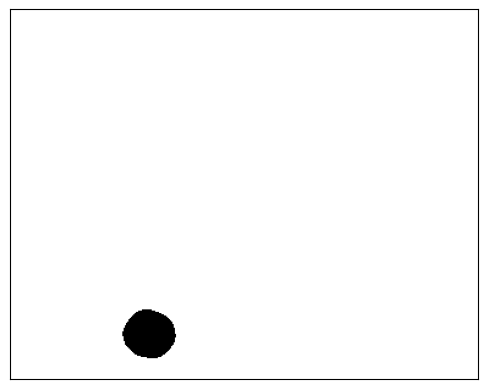

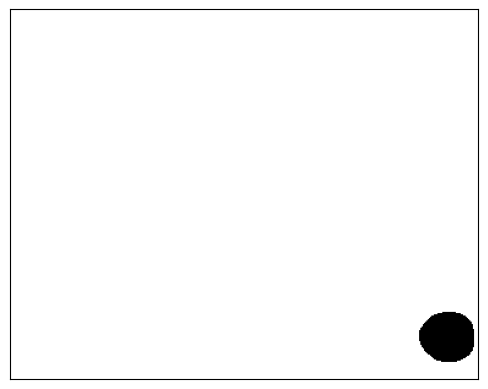

In [11]:
for unique_label in unique_labels:
    if unique_label == 0:
        continue
    else:
        mask = components == unique_label
        plt.imshow(mask, cmap = plt.cm.binary)
        # plt.axis('off')
        plt.xticks([])
        plt.yticks([])
        plt.show()

# Object detection from generated masks

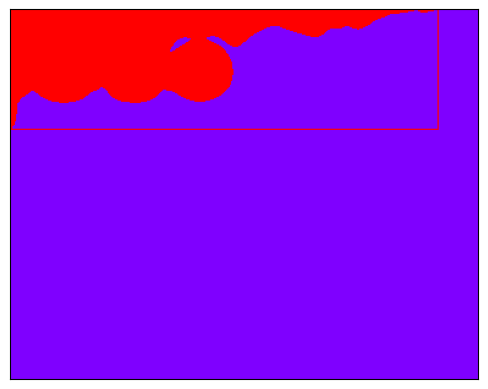

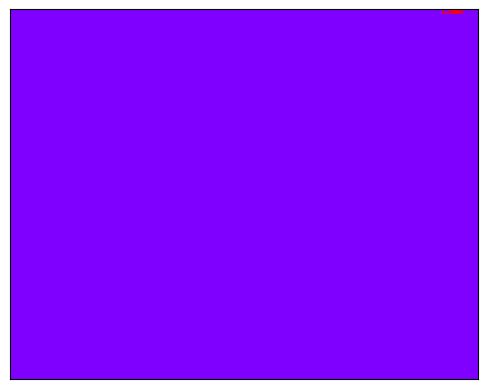

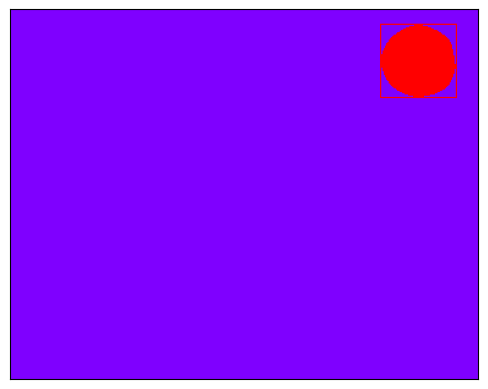

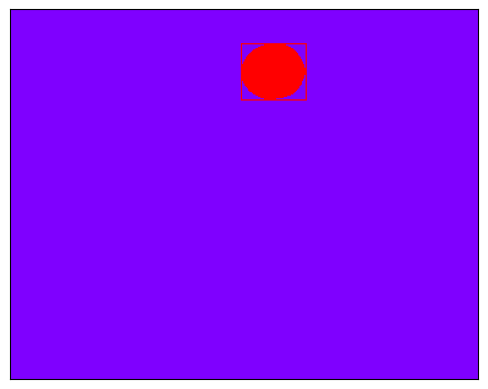

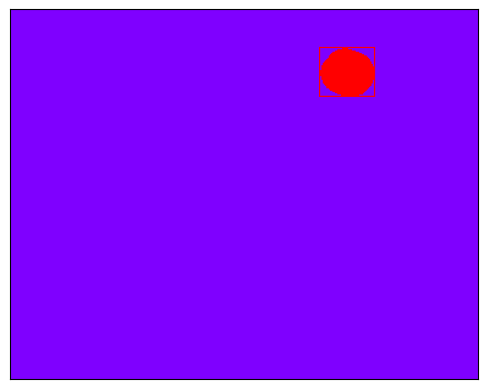

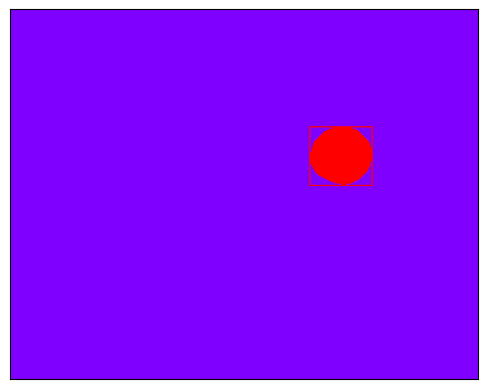

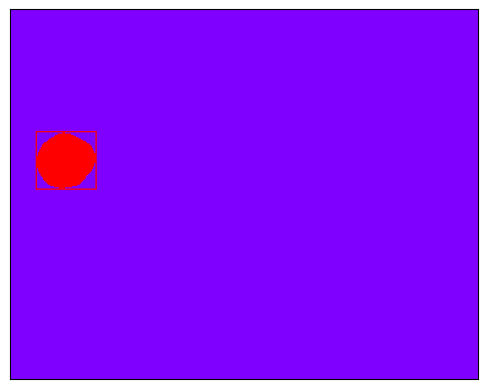

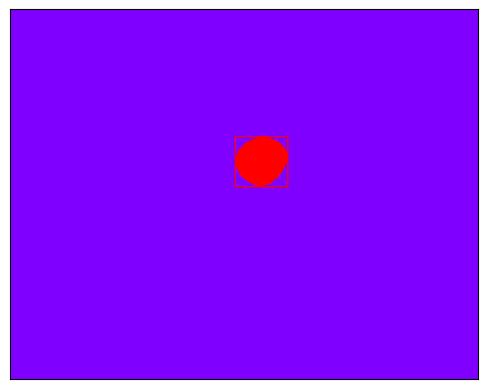

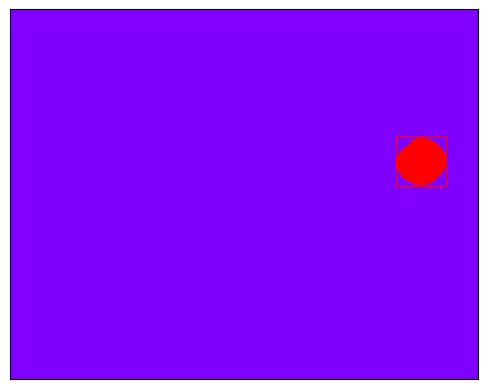

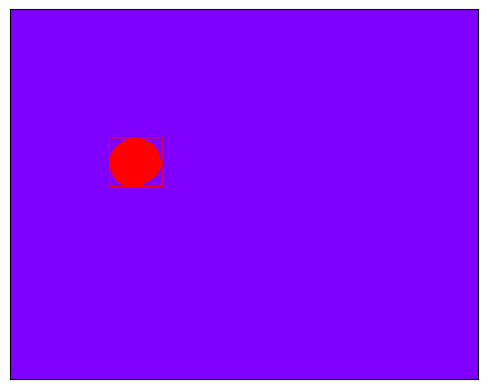

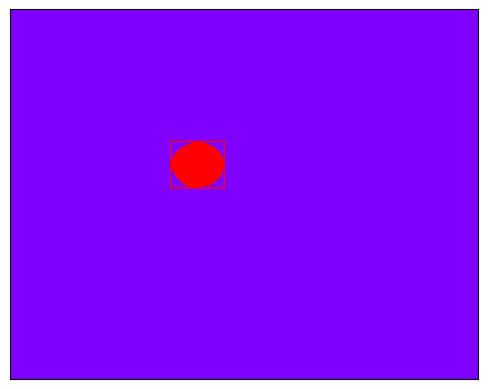

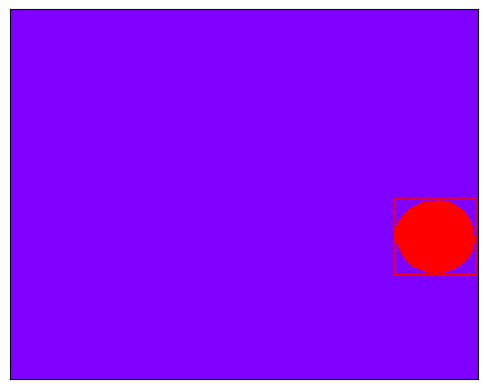

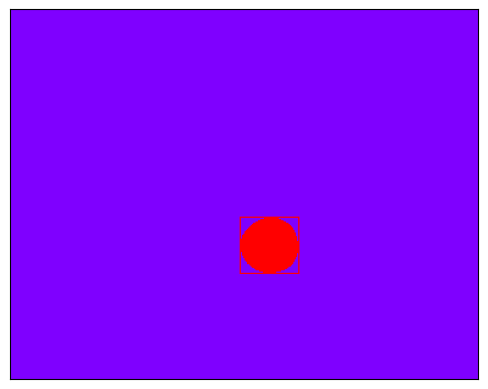

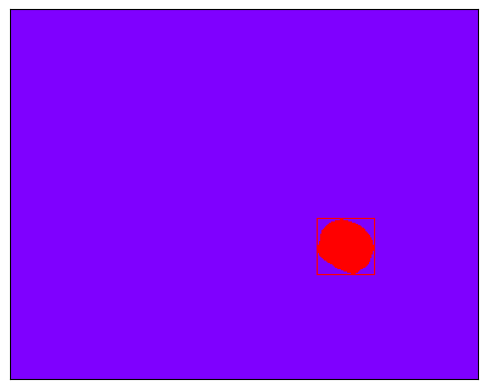

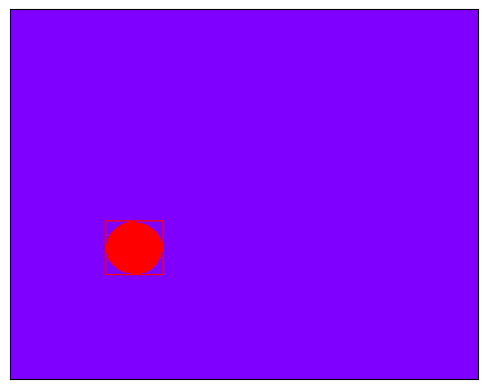

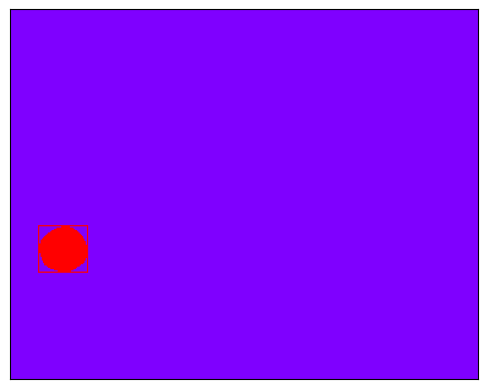

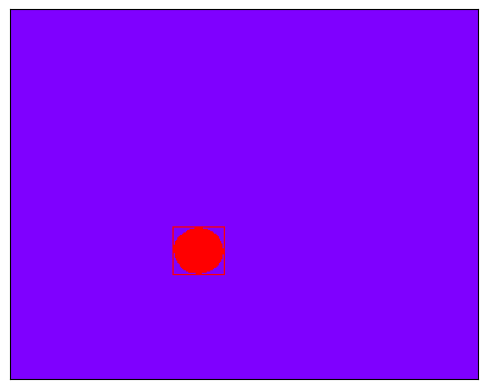

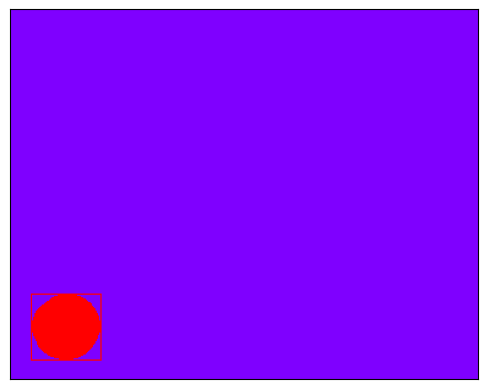

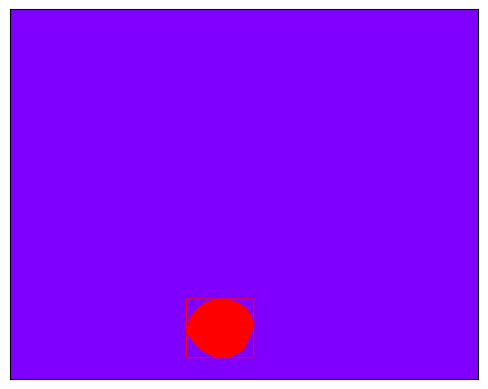

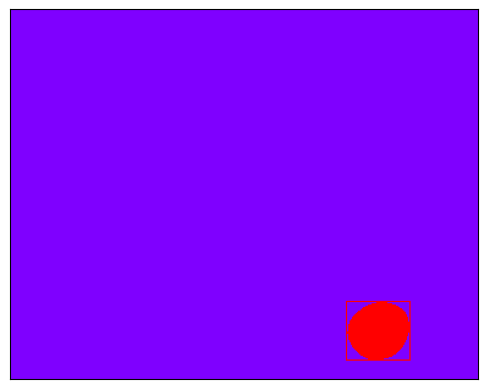

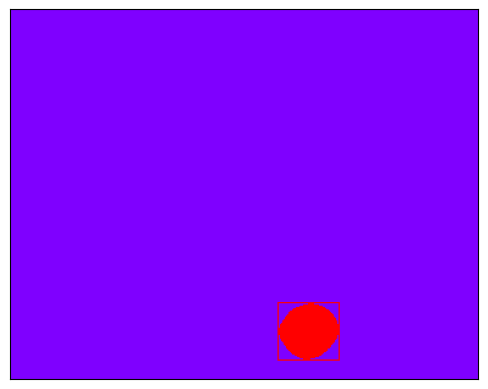

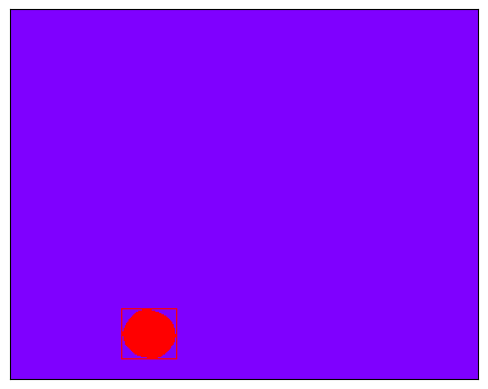

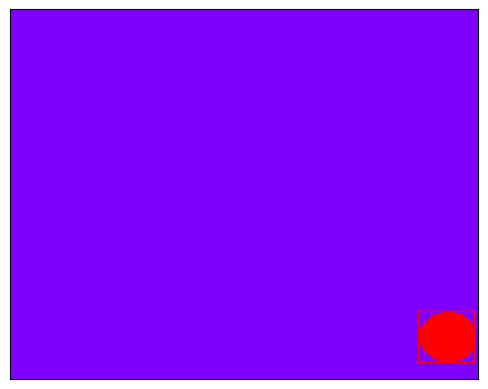

In [12]:
coordinate_list = []

for unique_label in unique_labels:
    if unique_label == 0:
        continue
    else:
        mask = components == unique_label
        coordinates = np.array(np.where(mask))
        x_max, x_min = coordinates[0].max(), coordinates[0].min()
        y_max, y_min = coordinates[1].max(), coordinates[1].min()
        coordinate_list.append([x_min, y_min, x_max, y_max])
        rr, cc = skdr.rectangle_perimeter((x_min, y_min), (x_max, y_max), shape = mask.shape, clip = True)

        mask[rr, cc] = 1

        plt.imshow(mask, cmap = plt.cm.rainbow)
        # plt.axis('off')
        plt.xticks([])
        plt.yticks([])
        plt.show()



## Displaying the bounding boxes enclosing those coins.
### Note it is not perfect but managable.

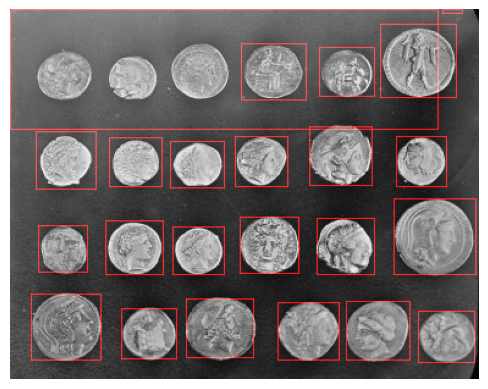

In [13]:
image_coins_rgb = skco.gray2rgb(image_coins)

for coordinate in coordinate_list:
    x_min, y_min, x_max, y_max = coordinate

    rr, cc = skdr.rectangle_perimeter(
        (x_min, y_min),
        (x_max, y_max),
        shape = image_coins_rgb.shape,
        clip = True,)

    image_coins_rgb[rr, cc, 0] = 255



plt.imshow(image_coins_rgb)
plt.axis('off')
plt.show()



# Same operation can be done with smaller scale/lower resolution

In [14]:
resized_coins = sktr.rescale(image_coins, scale = 0.50, anti_aliasing = True,)
resized_coins = skut.img_as_ubyte(resized_coins)

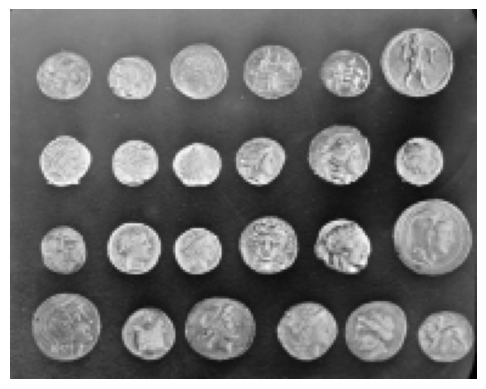

In [15]:
plt.imshow(resized_coins, cmap = plt.cm.gray)
plt.axis('off')
plt.show()

In [16]:
# %%timeit
blur_resized_image_coins = skfi.gaussian(resized_coins, sigma = 1.5,)

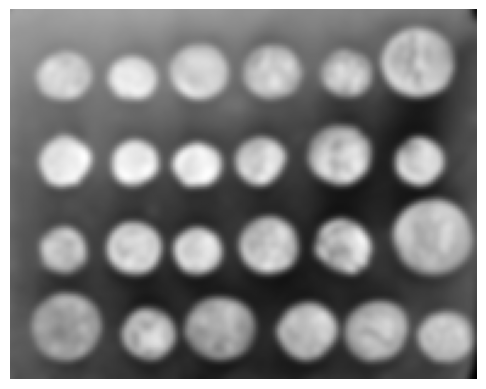

In [17]:
plt.imshow(blur_resized_image_coins, cmap = plt.cm.gray)
plt.axis('off')
plt.show()

In [18]:
threshold_smaller_image = skfi.threshold_otsu(blur_resized_image_coins)

gated_blur_smaller_image_coins = blur_resized_image_coins > threshold_smaller_image

In [19]:
print(gated_blur_smaller_image_coins.shape)

(152, 192)


In [20]:
components_smaller = skmo.label(gated_blur_smaller_image_coins)

unique_labels_smaller_image = np.unique(components_smaller)

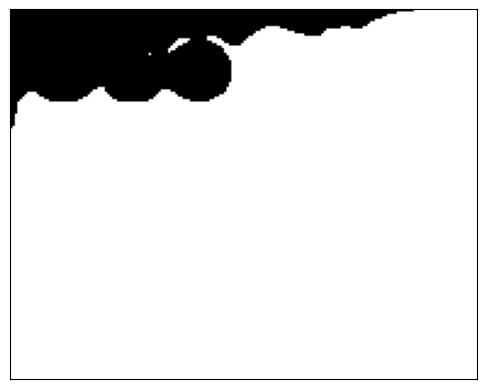

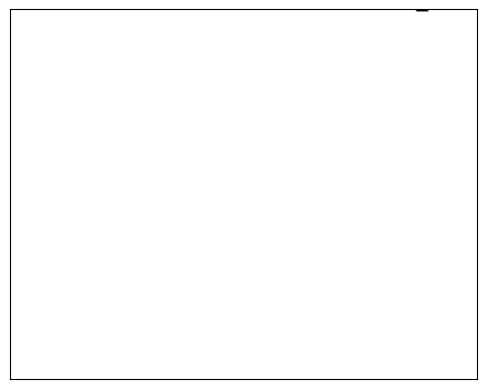

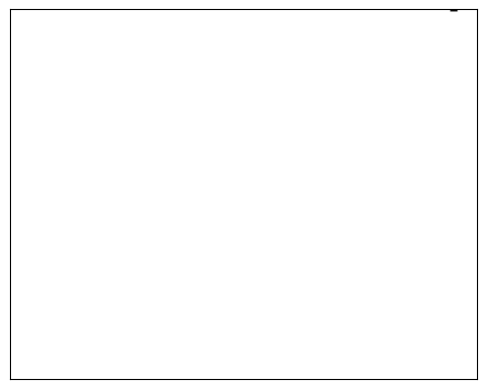

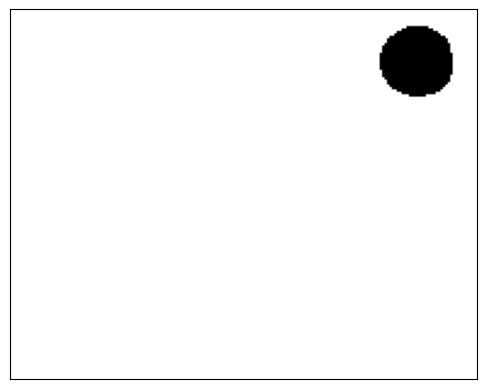

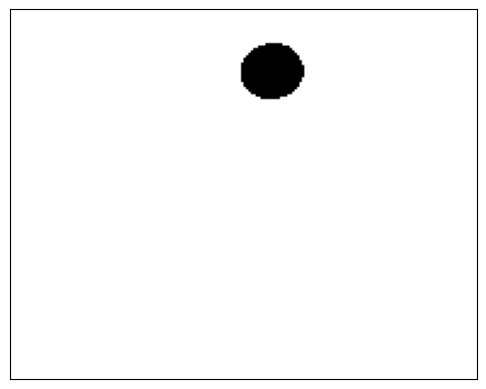

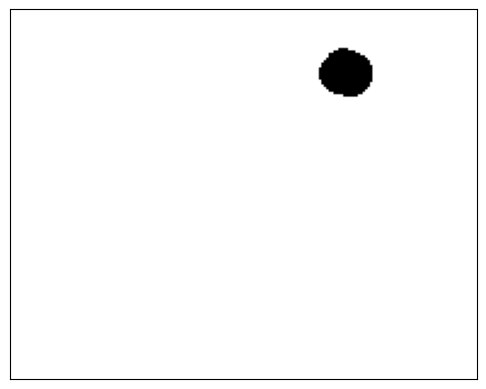

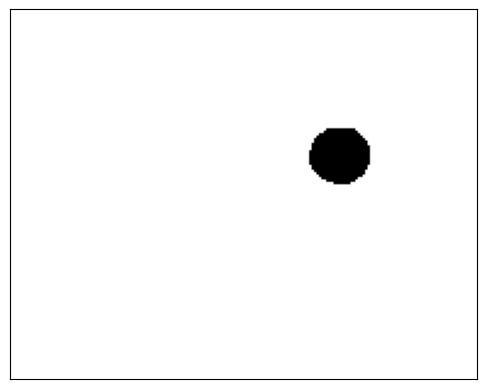

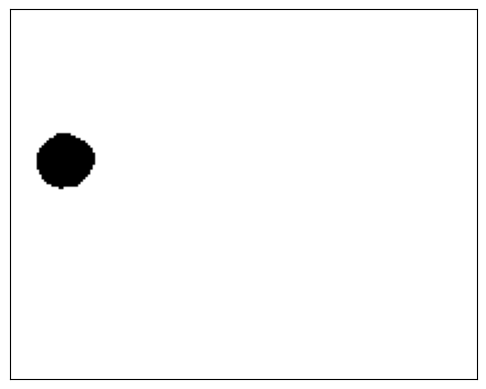

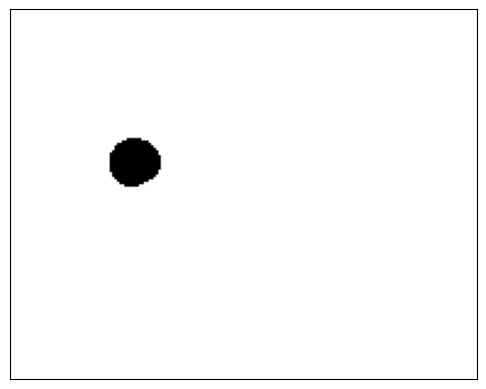

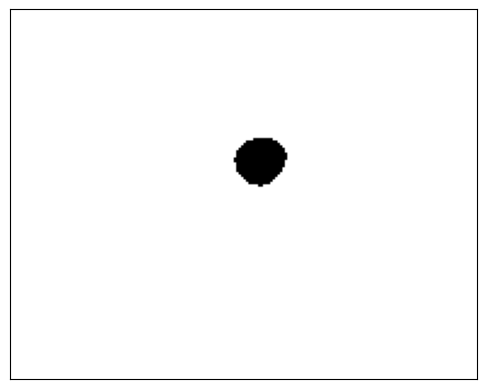

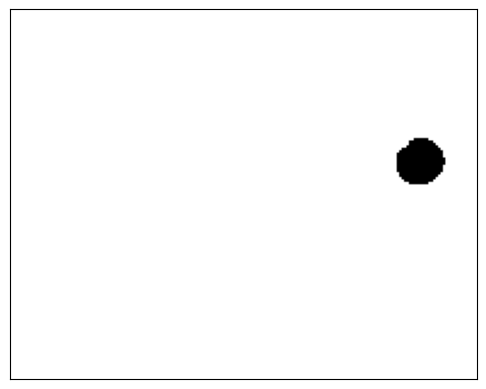

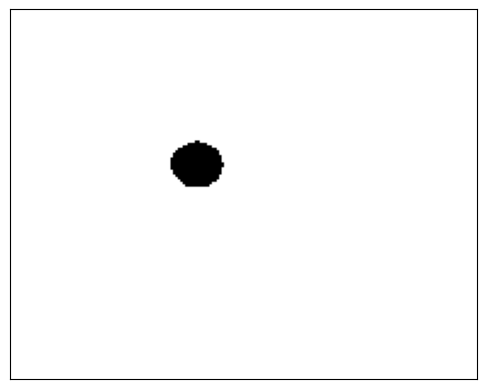

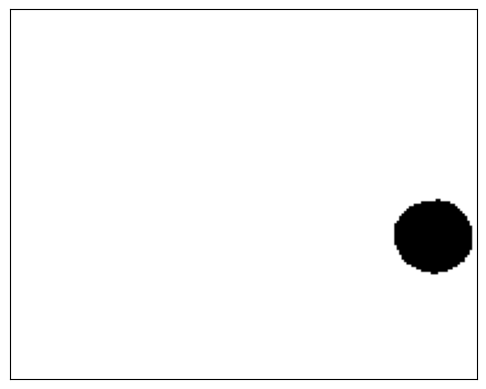

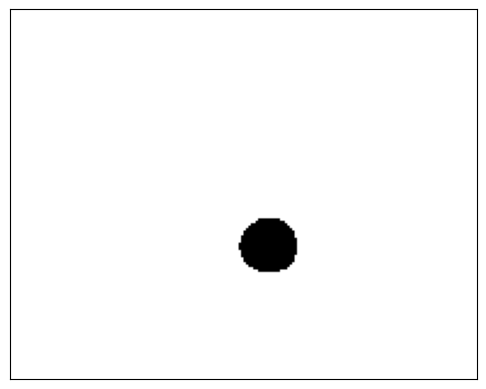

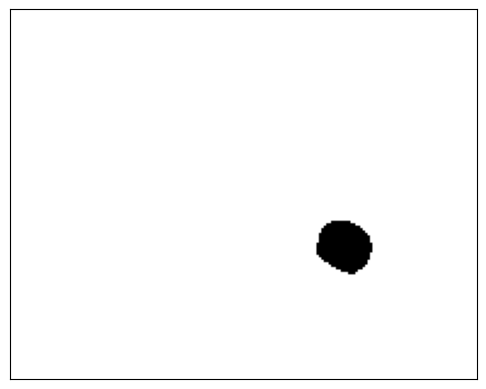

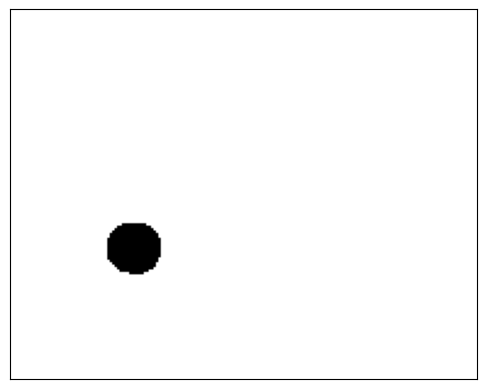

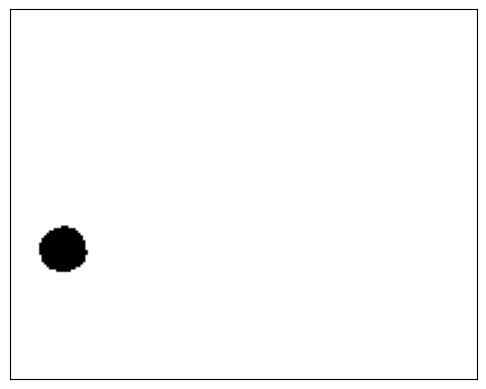

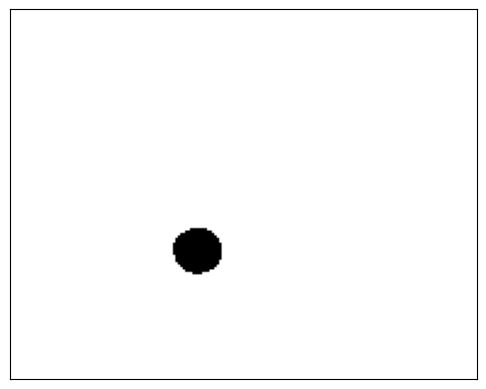

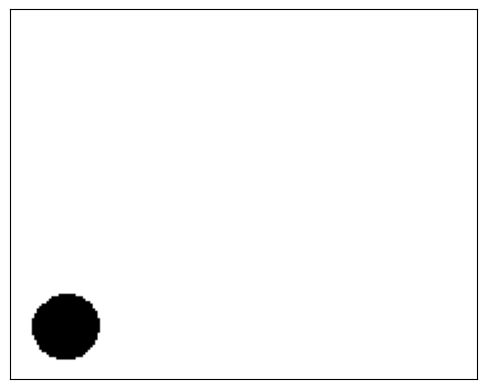

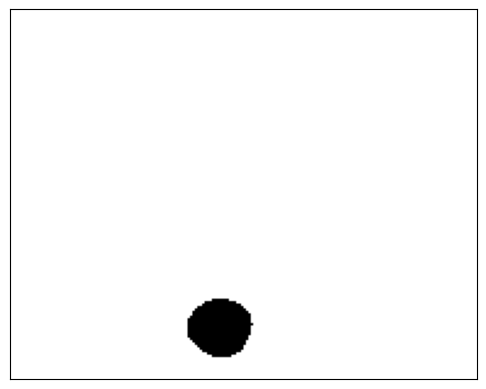

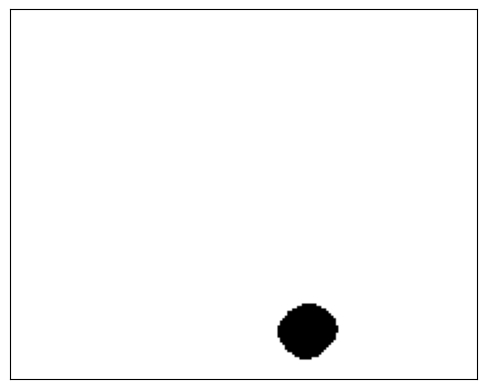

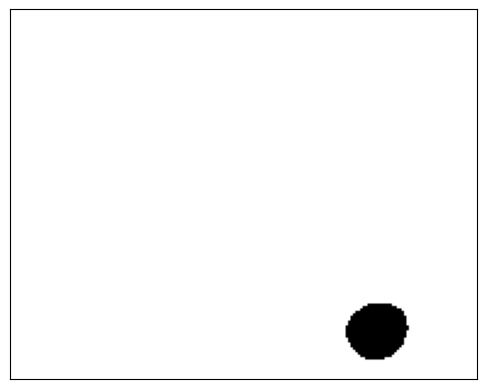

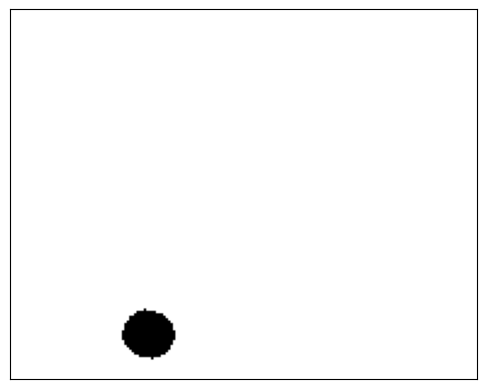

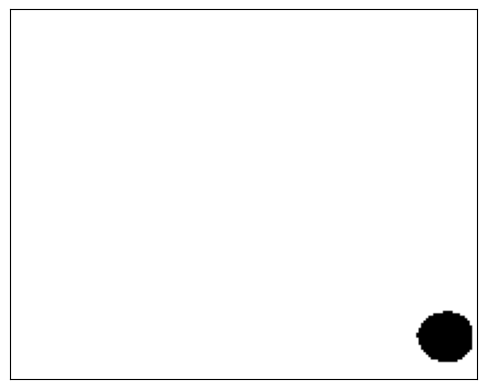

In [21]:


for unique_label in unique_labels_smaller_image:
    if unique_label == 0:
        continue
    else:
        mask = components_smaller == unique_label
        plt.imshow(mask, cmap = plt.cm.binary)
        # plt.axis('off')
        plt.xticks([])
        plt.yticks([])
        plt.show()

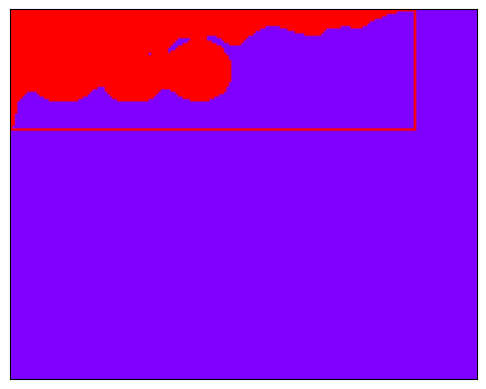

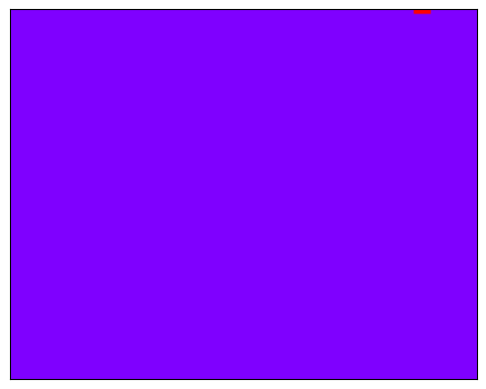

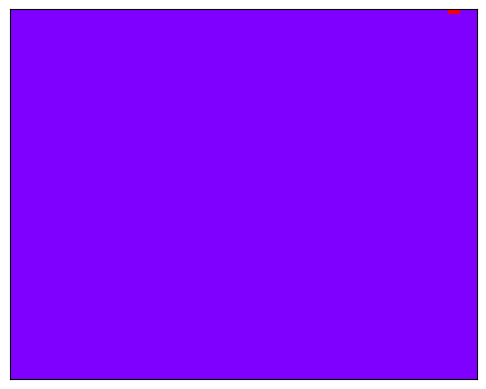

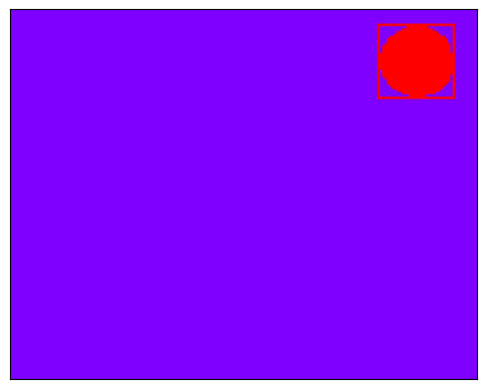

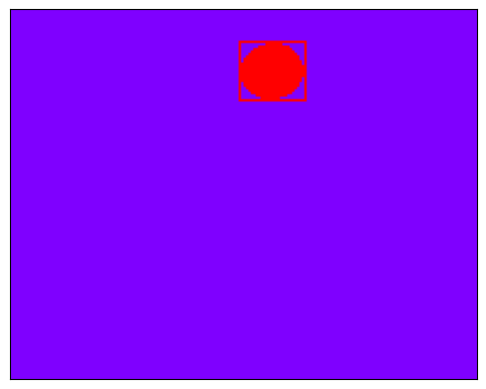

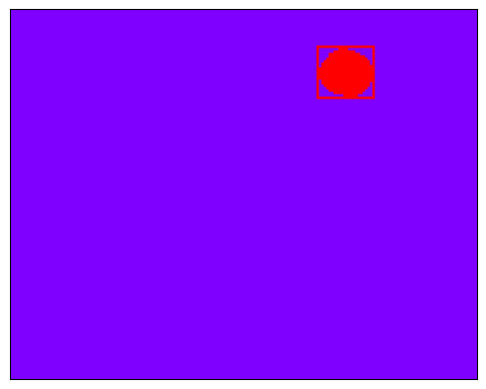

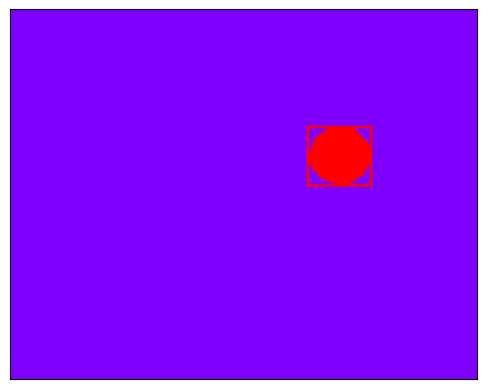

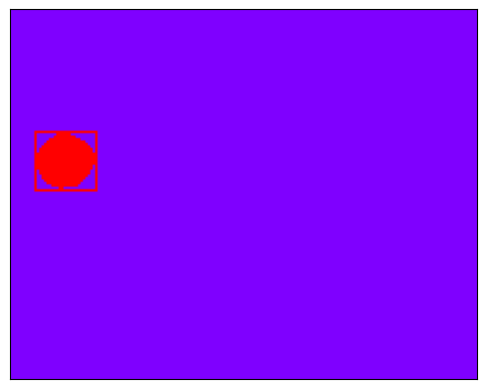

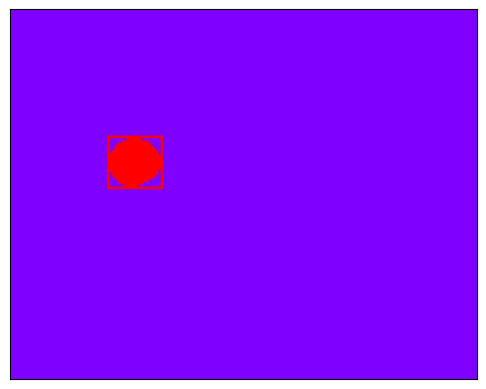

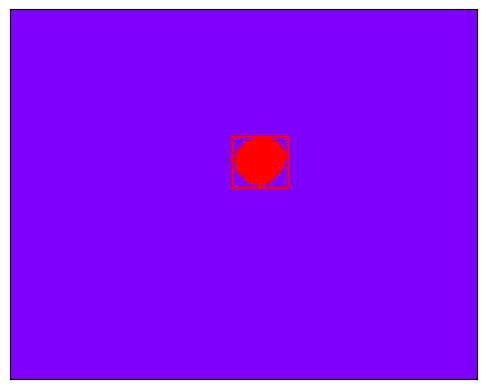

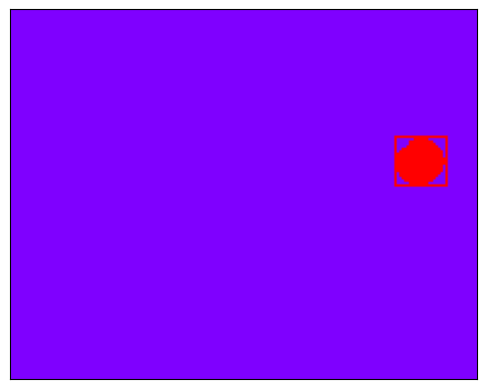

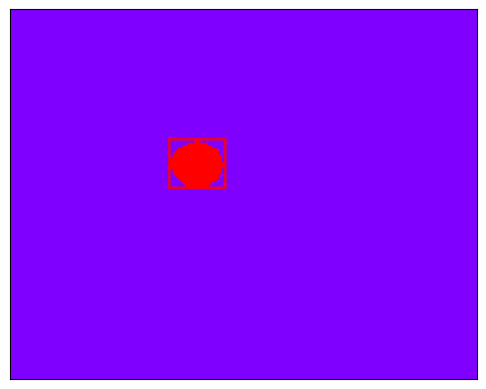

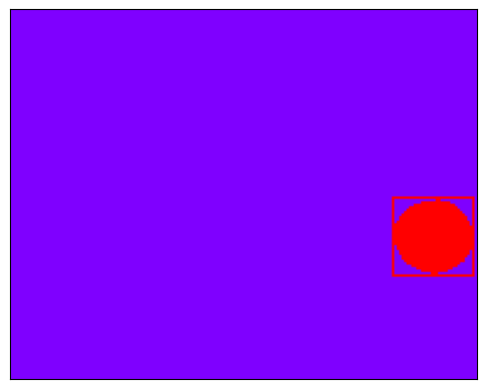

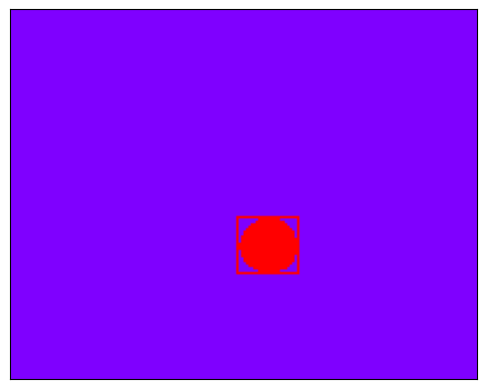

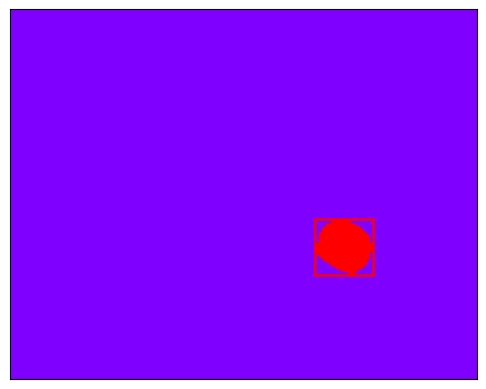

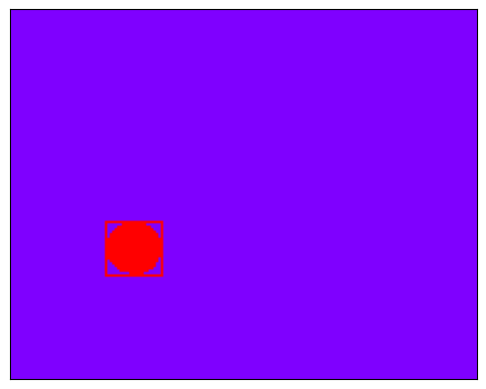

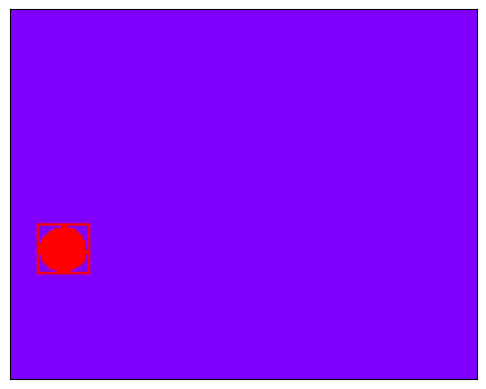

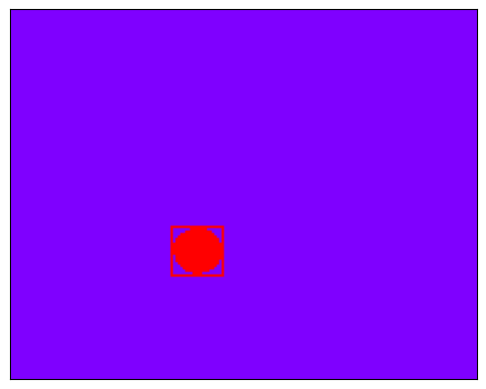

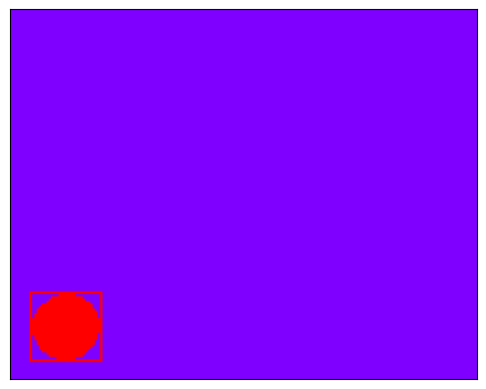

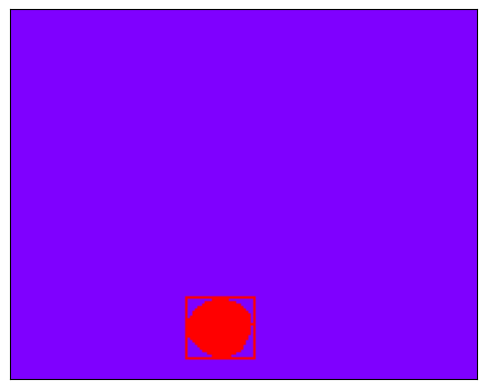

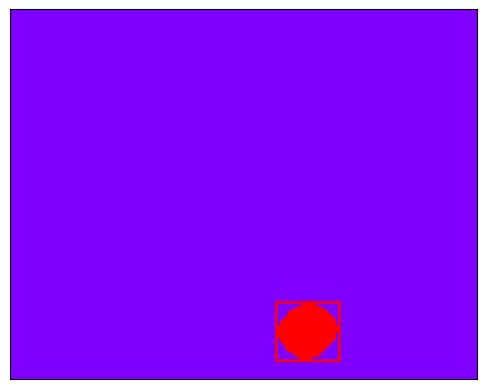

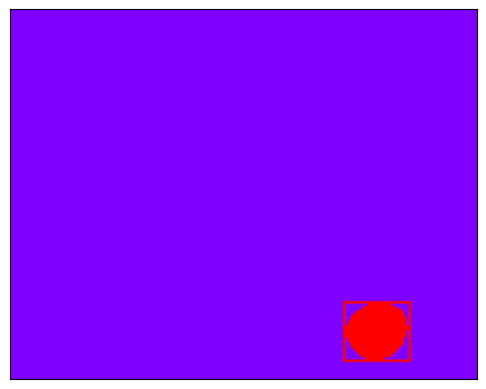

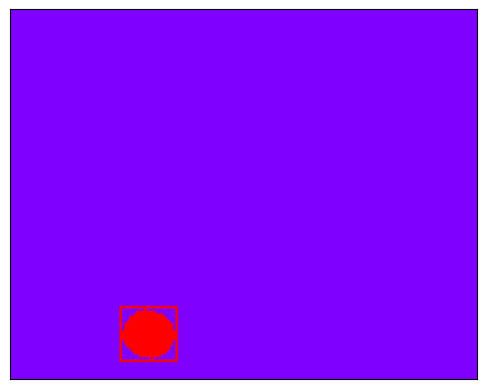

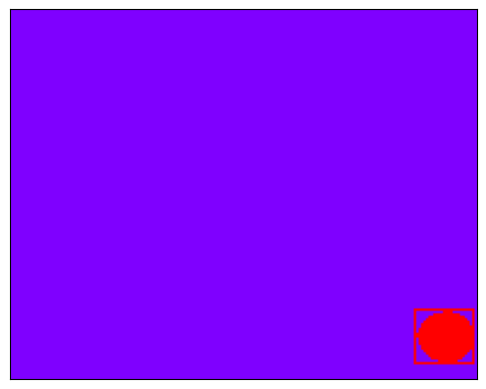

In [22]:
coordinate_list_smaller_image = []

for unique_label in unique_labels_smaller_image:
    if unique_label == 0:
        continue
    else:
        mask = components_smaller == unique_label
        coordinates = np.array(np.where(mask))
        if coordinates.shape[1] == 0:
            continue

        x_max, x_min = coordinates[0].max(), coordinates[0].min()
        y_max, y_min = coordinates[1].max(), coordinates[1].min()
        coordinate_list_smaller_image.append([x_min, y_min, x_max, y_max])
        rr, cc = skdr.rectangle_perimeter((x_min, y_min), (x_max, y_max), shape = mask.shape, clip = True)

        mask[rr, cc] = 1

        plt.imshow(mask, cmap = plt.cm.rainbow)
        # plt.axis('off')
        plt.xticks([])
        plt.yticks([])
        plt.show()


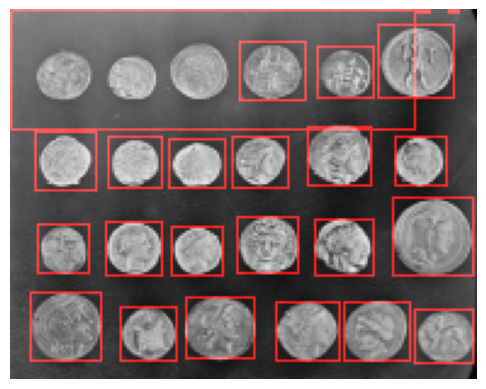

In [23]:
image_coins_rgb = skco.gray2rgb(resized_coins)

for coordinate in coordinate_list_smaller_image:
    x_min, y_min, x_max, y_max = coordinate


    rr, cc = skdr.rectangle_perimeter(
        (x_min, y_min),
        (x_max, y_max),
        shape = image_coins_rgb.shape,
        clip = True,)

    image_coins_rgb[rr, cc, 0] = 255



plt.imshow(image_coins_rgb)
plt.axis('off')
plt.show()

# Object detection using Deep Neural Networks

In [24]:
import torch
import torchvision

# Objection detection class instance
from torchvision.models.detection import (ssd300_vgg16,
                                          ssdlite320_mobilenet_v3_large,
                                          maskrcnn_resnet50_fpn,
                                          )

# Different Segmentation models
from torchvision.models.segmentation import (FCN,
                                             fcn_resnet50,
                                             deeplabv3_resnet50)


from torchvision.utils import (draw_bounding_boxes,
                               draw_segmentation_masks)

## Reading the image from the existing Dataset

In [25]:
# object_image = skda.coins()
# object_image = skda.chelsea()
object_image = skda.astronaut()
if len(object_image.shape) == 2:
    object_image = skco.gray2rgb(object_image)

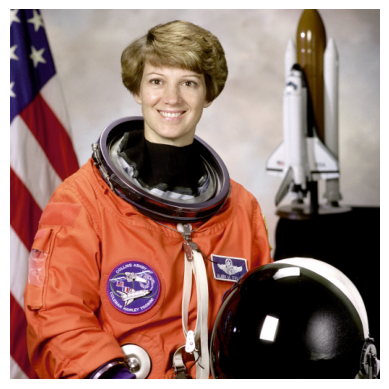

In [26]:
plt.imshow(object_image)
plt.axis('off')
plt.show()

## Defining an instance of object detection class

In [27]:
# detection_model = ssd300_vgg16(weights = torchvision.models.detection.SSD300_VGG16_Weights.DEFAULT)
detection_model = ssdlite320_mobilenet_v3_large(
    weights = torchvision.models.detection.SSDLite320_MobileNet_V3_Large_Weights
    )

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSDLite320_MobileNet_V3_Large_Weights.COCO_V1`. You can also use `weights=SSDLite320_MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/ssdlite320_mobilenet_v3_large_coco-a79551df.pth" to /root/.cache/torch/hub/checkpoints/ssdlite320_mobilenet_v3_large_coco-a79551df.pth


100%|██████████| 13.4M/13.4M [00:00<00:00, 47.8MB/s]


### The input image to be converted to tensor

In [28]:
input_tensor =  torchvision.transforms.ToTensor()(object_image)

In [29]:
print(input_tensor.shape)

torch.Size([3, 512, 512])


In [30]:
detection_model.eval()
prediction = detection_model([input_tensor])

In [31]:
print(prediction)

[{'boxes': tensor([[ 31.7985,   9.6872, 386.1101, 512.0000],
        [ 12.6729,  14.1918, 435.1651, 510.0934],
        [271.7778, 347.9149, 502.5034, 509.3478],
        ...,
        [114.0477, 397.9332, 259.9855, 507.3975],
        [157.9248, 178.2054, 294.2701, 283.4402],
        [208.8017, 292.9455, 283.2241, 462.3643]], grad_fn=<StackBackward0>), 'scores': tensor([0.9099, 0.1206, 0.1198, 0.1091, 0.1078, 0.1041, 0.1011, 0.0952, 0.0928,
        0.0832, 0.0802, 0.0702, 0.0640, 0.0632, 0.0629, 0.0629, 0.0627, 0.0611,
        0.0607, 0.0596, 0.0573, 0.0568, 0.0564, 0.0562, 0.0555, 0.0552, 0.0549,
        0.0548, 0.0534, 0.0531, 0.0523, 0.0516, 0.0515, 0.0513, 0.0508, 0.0506,
        0.0502, 0.0499, 0.0497, 0.0496, 0.0496, 0.0495, 0.0493, 0.0486, 0.0486,
        0.0485, 0.0484, 0.0472, 0.0472, 0.0466, 0.0464, 0.0455, 0.0449, 0.0447,
        0.0441, 0.0441, 0.0439, 0.0436, 0.0435, 0.0434, 0.0433, 0.0427, 0.0424,
        0.0422, 0.0419, 0.0414, 0.0412, 0.0411, 0.0409, 0.0407, 0.0407, 0.0406

## Identify all bounding boxes which satisfies at least a given threshold

In [32]:
detect_object_list = []


for box, score, label in zip(prediction[0]['boxes'], prediction[0]['scores'], prediction[0]['labels']):
    if score > 0.7:
        label = torchvision.models.detection.SSD300_VGG16_Weights.DEFAULT.meta['categories'][label]
        box = box.detach()
        detect_object_list.append([box, label, score])


### Drawing the bounding box as rectangles on the image

In [33]:
draw_box = draw_bounding_boxes(input_tensor, boxes=torch.tensor(np.array([box for box, _, _ in detect_object_list])),
                          labels=[label for _, label, _ in detect_object_list],
                        #   scores=[score for _, _, score in detect_object_list],
                          colors="Yellow",
                          width=4,
                            #    font = "arial.",
                            #    font_size=30
                               )

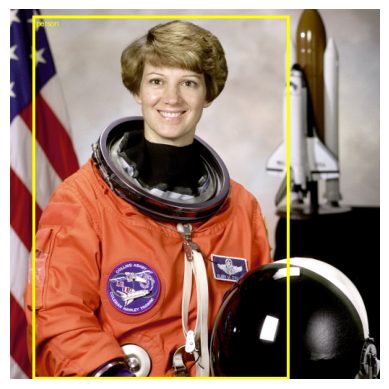

In [34]:
plt.imshow(torchvision.transforms.functional.to_pil_image(draw_box))
plt.axis('off')
plt.show()

# Segmentation Example

## Similarly defining an instance of segmentation model

In [35]:
segmentation_model = deeplabv3_resnet50(weights = torchvision.models.segmentation.DeepLabV3_ResNet50_Weights.DEFAULT)
segmentation_model.eval()

Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth


100%|██████████| 161M/161M [00:01<00:00, 161MB/s]


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [36]:
segmented_output = segmentation_model(input_tensor.unsqueeze(0))

segmented_output = torch.argmax(segmented_output['out'], dim = 1)

In [37]:
segmented_output.shape

torch.Size([1, 512, 512])

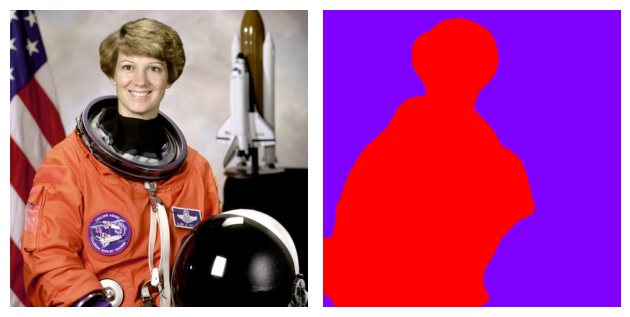

In [38]:
fig_seg, ax = plt.subplots(1,2,
                        #    layout = 'constrained'
                           )

ax[0].imshow(object_image)
ax[0].axis('off')
ax[1].imshow(segmented_output[0], cmap = plt.cm.rainbow)
ax[1].axis('off')
fig_seg.tight_layout()
plt.show()

## Another example of Image Segmentation

In [39]:
import requests
from io import BytesIO

In [40]:
path_to_an_image_with_people = ("https://www.census.gov/content/dam/Census/library/"
"stories/2019/05/younger-workers-in-cities-more-likely-to-bike-to-work.jpg")

In [41]:
response = requests.get(path_to_an_image_with_people,
                        headers={'User-Agent': 'Mozilla/5.0'})
image_of_people = skio.imread(BytesIO(response.content))

In [42]:
# input_tensor = torchvision.transforms.ToTensor()(skco.gray2rgb(skda.coins()))
input_tensor = torchvision.transforms.ToTensor()(image_of_people)

In [43]:
detection_model.eval()
prediction = detection_model([input_tensor])

In [44]:
detect_object_list = []


for box, score, label in zip(prediction[0]['boxes'], prediction[0]['scores'], prediction[0]['labels']):
    if score > 0.7:
        label = torchvision.models.detection.SSD300_VGG16_Weights.DEFAULT.meta['categories'][label]
        box = box.detach()
        detect_object_list.append([box, label, score])

In [45]:
draw_box = draw_bounding_boxes(input_tensor, boxes=torch.tensor(np.array([box for box, _, _ in detect_object_list])),
                          labels=[label for _, label, _ in detect_object_list],
                        #   scores=[score for _, _, score in detect_object_list],
                          colors="Yellow",
                          width=4,
                            #    font = "arial.",
                            #    font_size=30
                               )

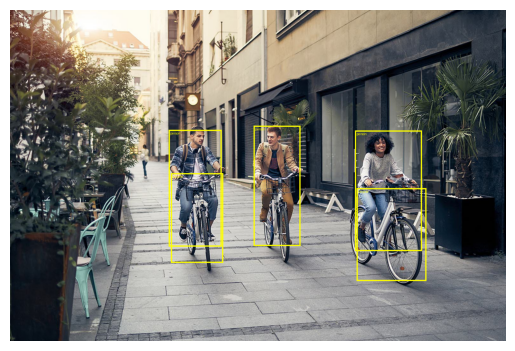

In [46]:
plt.imshow(torchvision.transforms.functional.to_pil_image(draw_box))
plt.axis('off')
plt.show()

# Object detection and Instance Segmenation

In [47]:
instance_segmentation_model = maskrcnn_resnet50_fpn(
    weights = torchvision.models.detection.MaskRCNN_ResNet50_FPN_Weights.DEFAULT
)

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


100%|██████████| 170M/170M [00:01<00:00, 158MB/s]


In [48]:
instance_segmentation_model.eval()

prediction = instance_segmentation_model(
    input_tensor.unsqueeze(0)
    )

In [49]:
prediction

[{'boxes': tensor([[ 502.8832,  358.7469,  675.5812,  742.2944],
          [1085.7965,  386.5836, 1256.9150,  752.8732],
          [ 764.0146,  367.0933,  920.6907,  733.5851],
          [1062.4877,  533.4376, 1304.7451,  867.4130],
          [ 785.9507,  511.6578,  899.3900,  797.5169],
          [ 408.4436,  424.8250,  437.5148,  532.4268],
          [ 539.5816,  529.7125,  645.6256,  814.5524],
          [ 190.2679,  701.1436,  296.5098,  981.9198],
          [ 219.3440,  556.6996,  359.3815,  787.0096],
          [ 277.4647,  559.1022,  366.4053,  723.5177],
          [ 268.7767,  384.1469,  403.6713,  575.3061],
          [1217.1473,  144.1514, 1554.7733,  667.3297],
          [ 812.7632,  284.8973,  958.3804,  522.7638],
          [ 534.0207,  420.5892,  624.7192,  501.6956],
          [ 557.7714,  268.8793,  592.1460,  302.9399],
          [ 216.4792,  637.0198,  321.4202,  804.9456],
          [ 654.0040,   78.5430,  717.4116,  161.2519],
          [1226.4277,  534.4294, 1282.4

In [50]:
detect_object_list = []


for box, score, label, mask in zip(prediction[0]['boxes'],
                             prediction[0]['scores'],
                             prediction[0]['labels'],
                             prediction[0]["masks"]):
    if score > 0.7:
        label = torchvision.models.detection.SSD300_VGG16_Weights.DEFAULT.meta['categories'][label]
        box = box.detach()
        mask = mask.detach()
        mask = mask > 0.5
        detect_object_list.append([box, label, score, mask])

In [51]:
draw_box = draw_bounding_boxes(input_tensor, boxes=torch.tensor(np.array([box for box, _, _,_ in detect_object_list])),
                          labels=[label for _, label, _,_ in detect_object_list],
                        #   scores=[score for _, _, score in detect_object_list],
                          colors="Yellow",
                          width=4,
                            #    font = "arial.",
                            #    font_size=30
                               )

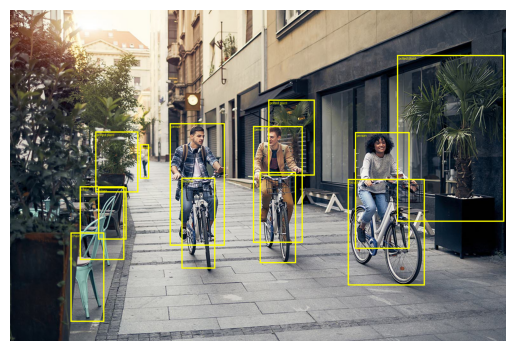

In [52]:
plt.imshow(torchvision.transforms.functional.to_pil_image(draw_box))
plt.axis('off')
plt.show()

In [53]:
draw_masks = draw_segmentation_masks(input_tensor,
                                     masks = torch.stack([mask.squeeze(0)
                                                           for _,_,_,mask
                                                           in detect_object_list]),
                                    alpha = 0.9,
)

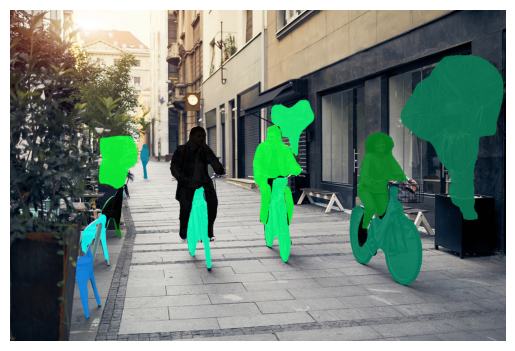

In [54]:
plt.imshow(torchvision.transforms.functional.to_pil_image(draw_masks))
plt.axis('off')
plt.show()

In [55]:
for _,_,_,mask in detect_object_list:
    print(mask.squeeze(0).shape)

torch.Size([1042, 1560])
torch.Size([1042, 1560])
torch.Size([1042, 1560])
torch.Size([1042, 1560])
torch.Size([1042, 1560])
torch.Size([1042, 1560])
torch.Size([1042, 1560])
torch.Size([1042, 1560])
torch.Size([1042, 1560])
torch.Size([1042, 1560])
torch.Size([1042, 1560])
torch.Size([1042, 1560])
torch.Size([1042, 1560])
